### 1. 경진대회명: 향후 판매량 예측
### 2. 미션: 2013년 1월부터 2015년 10월까지 판매 데이터를 바탕으로 2015년 11월 판매량 예측
### 3. 문제 유형: 회귀
### 4. 평가 지표: RMSE
### 5. 베이스라인 모델: LightGBM
### 6. 탐색적 데이터 분석: 데이터 병합, 그룹화
### 7. 성능 개선: 피처엔지니어링(피처명 한글화, 데이터 다운캐스팅, 조합, 이어붙이기, 병합, 이상치 제거, 파생 피처 생성)

▪ 핵심 요약
1. 훈련 데이터가 여러 파일로 제공되면 공통 피처를 기준으로 병합해 사용
2. 타깃값이 직접적으로 제공되지 않기도 함, 이럴 땐 존재하는 피처를 조합하거나 계산해 타깃값을 구해야 함
3. 회귀 문제에서는 특정 피처를 기준으로 데이터를 그룹화해 값을 집계해 사용하는 일이 많음
4. 피처가 다양할 때는 피처명을 한글화하는 것도 좋은 방법임
5. 데이터가 크면 메모리 관리도 신경 써야 함(데이터 다운캐스팅, 가비지 컬렉션)
6. 이상치가 있을 대는 해당 데이터 자체를 제거하거나 적절한 값으로 바꿔줘야 함
7. 둘 이상의 피처를 조합하면 유용한 데이터의 수가 늘어나는 효과가 있음
8. 분류 피처의 각 분류별 데이터 수가 적다면 대분류로 다시 묶어 훈련하는 것도 좋은 방법임
9. 시계열 데이터에서는 시간 흐름 자체가 중요한 정보임
10. 시차 피처란 과거 시점에 관한 피처로,
성능 향상에 도움되는 경우가 많아서 시계열 문제에서 자주 만드는 파생 피처임

### 경진대회 Overview
##### 과거 판매 데이터를 토대로 향후 판매량 예측
▪ 타깃값은 판매량이므로 범주형 데이터가 아님. 따라 회귀 문제에 속함
##### 주어진 데이터는 2013년 1월부터 2015년 10월까지의 일별 판매 내역
▪ 더불어 상점, 상품, 상품분류에 관한 추가 데이터도 있음
▪ 이 데이터를 기반으로 2015년 11월 각 상점의 상품별 월간 판매량을 예측해야 함
▪ 피처: 상점 및 상품에 관한 정보, 타깃값: 월간 판매량
• 주의점
▪ 상품별 월간 판매량(타깃값)은 0개에서 20개 사이여야 함
▪ 타깃값뿐만 아니라 판매량과 관련된 피처는 모두 0~20 사이로 값을 제한해야 함


# 9.2 탐색적 데이터 분석  
# 9.3 베이스라인 모델  
# 9.4 성능 개선  
---  
# 9.2 탐색적 데이터 분석  
### 9.2.1 데이터 둘러보기  
### 9.2.2 데이터 시각화  

# 9.3 베이스라인 모델  
### 9.3.1 피처 엔지니어링 I : 피처명 한글화  
### 9.3.2 피처 엔지니어링 II : 데이터 다운캐스팅  
### 9.3.3 피처 엔지니어링링 III : 데이터 조합 생성  
### 9.3.4 피처 엔지니어링 IV : 타깃값(월간 판매량) 추가  
### 9.3.5 피처 엔지니어링 V : 테스트 데이터 이어붙이기  
### 9.3.6 피처 엔지니어링 VI : 나머지 데이터 병합(최종 데이터 생성)  
### 9.3.7 피처 엔지니어링 VII : 마무리  
  
# 9.4 성능 개선  
### 9.4.1 피처 엔지니어링 I : 피처명 한글화와 데이터 다운캐스팅  
### 9.4.2 피처 엔지니어링 II : 개별 데이터 피처 엔지니어링  
### 9.4.3 피처 엔지니어링 III : 데이터 조합 및 파생 피처 생성  
### 9.4.4 피처 엔지니어링 IV : 데이터 합치기  
### 9.4.5 피처 엔지니어링 V : 시차 피처 생성  
### 9.4.6 피처 엔지니어링 VI : 기타 피처 엔지니어링  
### 9.4.7 피처 엔지니어링 VII : 마무리  
### 9.4.8 모델 훈련 및 성능 검증  
### 9.4.9 예측 및 결과 제출  

LightGBM
- 트리 기반 앙상블
- 빠른 학습과 예측 시간
- 더 적은 메모리 사용
- 범주형 특징의 자동 변환과 최적 분할

### 9.2 탐색적 데이터 분석
#### 9.2.1 데이터 둘러보기
##### 주어진 데이터 둘러보기

In [ ]:
import pandas as pd

item_categories = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/item.categories.csv", encoding='euckr')
items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/items_최종.csv", encoding='euckr')
sales_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/sales_train.csv")
shops = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/shops.csv", encoding='euckr')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/sample_submission.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,"PC - Гарнитуры/Наушники,0",0
1,"Аксессуары - PS2,1",1
2,"Аксессуары - PS3,2",2
3,"Аксессуары - PS4,3",3
4,"Аксессуары - PSP,4",4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.),0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV),2,40
3,***ГОЛУБАЯ ВОЛНА (Univ),3,40
4,***КОРОБКА (СТЕКЛО),4,40


In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
shops.head()

,"shop_name,shop_id",shop_id
0,"!Якутск Орджоникидзе, 56 фран,0",0
1,"!Якутск ТЦ ""Центральный"" фран,1",1
2,"Адыгея ТЦ ""Мега"",2",2
3,"Балашиха ТРК ""Октябрь-Киномир"",3",3
4,"Волжский ТЦ ""Волга Молл"",4",4


In [ ]:
# shop_name 뒤에 붙은 불필요 정보 제거 (','기준)
shops['shop_name,shop_id'] = shops['shop_name,shop_id'].str.split(',').str[0]

# 열 이름 변경하기
shops.rename(columns={'shop_name,shop_id':'shop_name'}, inplace=True)
shops.head()

,shop_name,shop_id
0,!Якутск Орджоникидзе,0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
# 2013년 1월 ~ 2015년 10월 (총 34개월)
sales_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22168 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


### 9.2 탐색적 데이터 분석
#### 9.2.1 데이터 둘러보기
##### 데이터 병합

In [ ]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,"Кино - Blu-Ray,37"
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,"Музыка - Винил,58"
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,"Музыка - Винил,58"
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,"Музыка - Винил,58"
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Музыка - CD фирменного производства,56"


### 9.2 탐색적 데이터 분석
#### 9.2.1 데이터 둘러보기
##### 피처 요약표 만들기

In [ ]:

def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')

  # 새로운 데이터프레임 생성
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index': '피처'})

  # 새로운 컬럼 생성 '결측값 갯수'
  summary['결측값 갯수'] = df.isnull().sum().values

  # 새로운 컬럼 생성 '고윳값 갯수'
  summary['고윳값 갯수'] = df.nunique().values

  # 0번째 인자, 1번째 인자 값 출력
  summary['첫 번째 값'] = df.loc[0].values
  summary['두 번째 값'] = df.loc[1].values

  return summary


resumetable(train)



데이터셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 갯수,고윳값 갯수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,7,21805,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,"Кино - Blu-Ray,37","Музыка - Винил,58"


### 9.2 탐색적 데이터 분석
#### 9.2.2 데이터 시각화
##### ▪  병합한 train을 이용해 데이터 시각화
##### ▪  피처 갯수가 많지 않고, 그 중 일부는 식별자거나 문자 데이터라서 시각화 양이 적음
##### ▪ 일별 판매량
> • train에서 식별자나 문자 데이터를 빼면 item_cnt_day 피처와 item_price 피처만 남음  
> • 우선 item_cnt_day 피처 시각화  
> • 이상치가 많아서 박스플롯 모양이 이상함  
> • 과한 이상치는 제거해야 함  
> • 여기선 item_cnt_day 1,000 이상인 데이터 제거









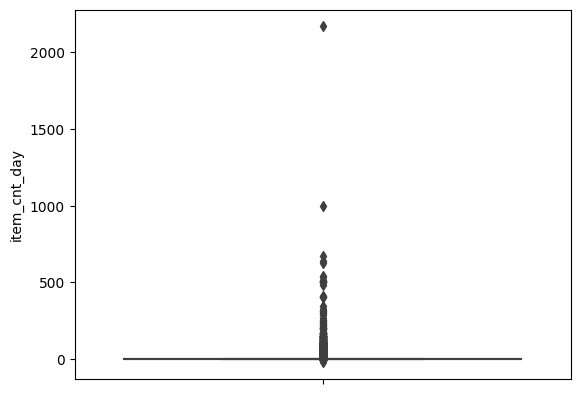

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.boxplot(y='item_cnt_day', data=train);

### 9.2 탐색적 데이터 분석
#### 9.2.2 데이터 시각화
##### • 판매량(상품 가격)


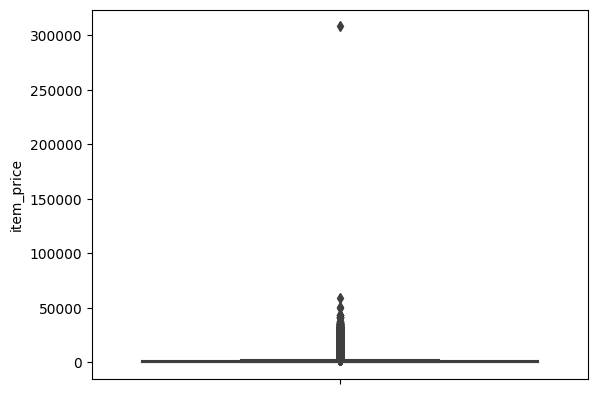

In [ ]:
sns.boxplot(y='item_price', data=train);

### 9.2 탐색적 데이터 분석
#### 9.2.2 데이터 시각화
##### • 그룹화

In [ ]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group.reset_index() # 인덱스 재설정

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


### 9.2 탐색적 데이터 분석
#### 9.2.2 데이터 시각화
##### • 월별 판매량

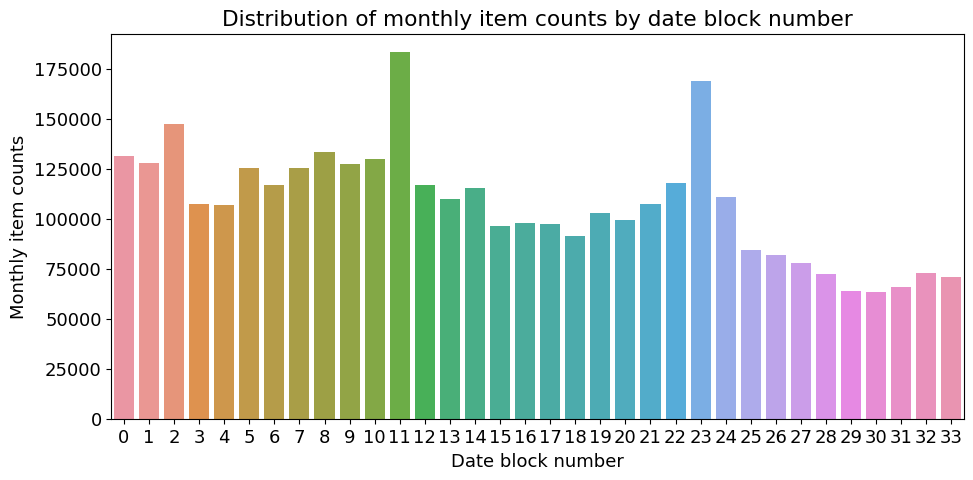

In [ ]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)
# 월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group_month_sum = group_month_sum.reset_index()
# 월별 총 상품 판매량 막대 그래프
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)
# 그래프 제목, x축 라벨, y축 라벨명 설정
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='Date block number',
       ylabel='Monthly item counts');

### 9.2 탐색적 데이터 분석
#### 9.2.2 데이터 시각화
##### • 상품분류별 판매량

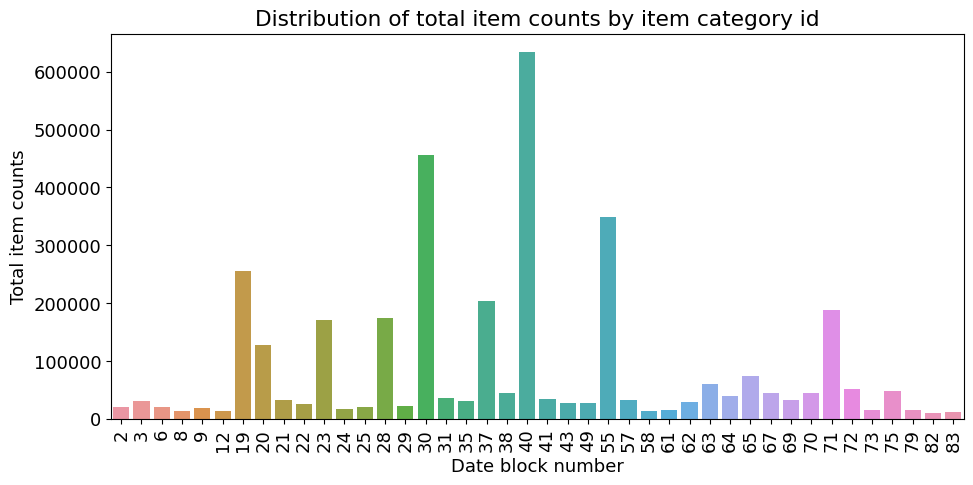

In [ ]:
figure, ax= plt.subplots()
figure.set_size_inches(11, 5)

# 상품분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 월간 판매량이 10,000개를 초과하는 상품분류만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

# 상품분류별 총 상품 판매량 막대 그래프
sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
xlabel='Date block number',
ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # x축 라벨 회전

### 9.2 탐색적 데이터 분석
#### 9.2.2 데이터 시각화
##### • 상점별 판매량

# 9.2 탐색적 데이터 분석
▪ 분석 정리 및 모델링 전략  
• 분석 정리  
1. 판매량 관련 피처 값은 모두 0~20 사이로 제한해야 함
2. 시계열 데이터이므로 데이터 순서를 꼭 지켜야 함(검증 데이터는 최근 1개월치 이용)
3. 타깃값 : 같은 달 일별 판매량을 합쳐 타깃값(월별 판매량)을 구해야 함
4. 데이터 병합 : 추가 정보 파일(상점, 상품, 상품분류)은 각각의 ID(상점ID, 상품ID, 상품분류ID)를 기준으로 훈련데이터에 병합할 수 있음
5. 다양한 피처 엔지니어링 후 데이터 크기가 커서 메모리 관리 필요
6. 파생 피처 추가 : 상점명과 상품분류명의 첫 단어는 각각 도시와 대분류
7. 피처 제거 : 월별 판매량만 구하면 되니 date 피처 필요 없음
8. 피처 제거 : 상점ID, 상품ID, 상품분류ID는 각각 상점명, 상품명, 상품분류명과 1:1로 매칭되므로 둘 중 하나만 있으
면 됨
9. 이상치 제거 : 일별 판매량과 판매가에는 값이 이상치가 있어서 제거 필요
10. 모든 데이터에서 결측값이 없음

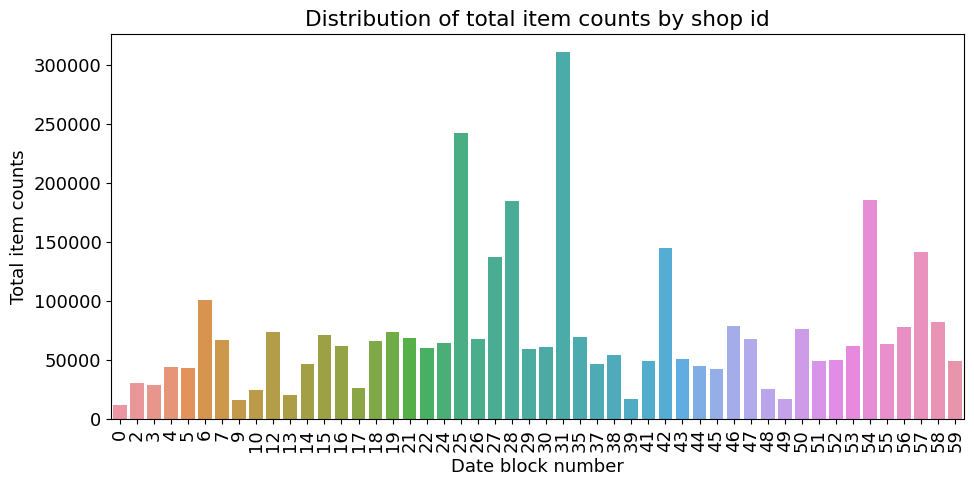

In [ ]:
figure, ax= plt.subplots()
figure.set_size_inches(11, 5)

# 상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop_sum = group_shop_sum.reset_index()
group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

# 상점별 총 상품 판매량 막대그래프
sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum)
ax.set(title='Distribution of total item counts by shop id',
xlabel='Date block number',
ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)


### 9.3 베이스라인 모델
#### 베이스라인 모델 절차
##### 베이스라인 모델로는 LightGBM 사용

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 경로
item_categories = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/item.categories.csv", encoding='euckr')
items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/items_최종.csv", encoding='euckr')
sales_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/sales_train.csv")
shops = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/shops.csv", encoding='euckr')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/sample_submission.csv")

### 9.3 베이스라인 모델
#### 9.3.1 피처 엔지니어링 I : 피처명 한글화
##### • sales_train 피처명 한글화

In [ ]:
sales_train = sales_train.rename(columns={'date': '날짜',
                                          'date_block_num': '월ID',
                                          'shop_id': '상점ID',
                                          'item_id': '상품ID',
                                          'item_price': '판매가',
                                          'item_cnt_day': '판매량'})
sales_train.head()


,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


##### • shops 피처명 한글화

In [ ]:
shops.head()

,"shop_name,shop_id",shop_id
0,"!Якутск Орджоникидзе, 56 фран,0",0
1,"!Якутск ТЦ ""Центральный"" фран,1",1
2,"Адыгея ТЦ ""Мега"",2",2
3,"Балашиха ТРК ""Октябрь-Киномир"",3",3
4,"Волжский ТЦ ""Волга Молл"",4",4


In [ ]:
# shop_name 뒤에 붙은 불필요 정보 제거 (','기준)
shops['shop_name,shop_id'] = shops['shop_name,shop_id'].str.split(',').str[0]

# 열 이름 변경하기
shops.rename(columns={'shop_name,shop_id':'shop_name'}, inplace=True)
shops.head()

,shop_name,shop_id
0,!Якутск Орджоникидзе,0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
shops = shops.rename(columns={'shop_name':'상점명', 'shop_id':'상점ID'})
shops.head()

,상점명,상점ID
0,!Якутск Орджоникидзе,0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


##### • items 피처명 한글화

In [ ]:
items = items.rename(columns={'item_name': '상품명',
'item_id': '상품ID',
'item_category_id': '상품분류ID'})
items.head()


,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.),0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV),2,40
3,***ГОЛУБАЯ ВОЛНА (Univ),3,40
4,***КОРОБКА (СТЕКЛО),4,40


##### • item_categories 피처명 한글화

In [ ]:
item_categories = item_categories.rename(columns=
{'item_category_name': '상품분류명',
'item_category_id': '상품분류ID'})

item_categories.head()

,상품분류명,상품분류ID
0,"PC - Гарнитуры/Наушники,0",0
1,"Аксессуары - PS2,1",1
2,"Аксессуары - PS3,2",2
3,"Аксессуары - PS4,3",3
4,"Аксессуары - PSP,4",4


##### • test 피처명 한글화

In [ ]:
test = test.rename(columns={'shop_id': '상점ID', 'item_id': '상품ID'})

test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### 9.3 베이스라인 모델
#### 9.3.2 피처 엔지니어링 II : 데이터 다운캐스팅
##### • 다운캐스팅이란?
▪ 다운캐스팅downcasting이란 더 작은 데이터 타입으로 변환하는 작업  
▪ 메모리 낭비를 막고, 훈련 속도를 빠르게 하려면 모든 데이터를 최대 타입으로 할당할 필요는 없음(분석 정리
5)  

In [ ]:
def downcast(df, verbose=True):
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    dtype_name = df[col].dtype.name
    if dtype_name == 'object':
     pass
    elif dtype_name == 'bool':
      df[col] = df[col].astype('int8') #가장 작은 8비트로
    elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
      df[col] = pd.to_numeric(df[col], downcast='integer')
    else:
     df[col] = pd.to_numeric(df[col], downcast='float')
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose:
    print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
  return df

In [ ]:
# 5개의 데이터프레임 모두 다운캐스팅
all_df = [sales_train, shops, items, item_categories, test]

for df in all_df:
  df = downcast(df)

54.2% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


### 9.3 베이스라인 모델
#### 9.3.3 피처 엔지니어링링 III : 데이터 조합 생성
##### • 데이터 조합  
###### ▪ itertools 패키지가 제공하는 product( ) 함수로 데이터 조합 생성
참조 https://kimdoky.github.io/python/2019/11/24/python-itertools/



In [ ]:
from itertools import product #product: 중첩된 for 루프와 동등한 cartesian product(무얼 말하는지 모르겠음)

train = []

# 월ID, 상점ID, 상품ID 조합 생성
for i in sales_train['월ID'].unique():                                  # i : 0 ~ 33
  all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique() # 월ID가 i일때 unique한 모든 상점ID
  all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique() # 월ID가 i일때 unique한 모든 상품ID
  train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처

# 리스트 타입인 train을 DataFrame 타입으로 변환
train = pd.DataFrame(np.vstack(train), columns=idx_features)           # train리스트를 vertical stack으로 층층이 쌓음

train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


### 9.3 베이스라인 모델
#### 9.3.1 피처 엔지니어링 IV : 타깃값(월간 판매량) 추가
##### • 타깃값이 각 상점의 상품별 판매량 추가
▪ sales_train에 있는 일별 판매량 피처를 그룹화해서
우리가 원하는 타깃값인 각 상점의 상품별 ‘월간’ 판매량 생성  
▪ 앞서 피처 조합을 만들 때 생성한
idx_features = [‘월ID’, ‘상점ID’, ‘상품ID’]를 기준으로 그룹화


In [ ]:
# idx_features를 기준으로 그룹화해 판매량 합 구하기
group = sales_train.groupby(idx_features).agg({'판매량': 'sum'})

# 인덱스 재설정
group = group.reset_index()

# 피처명을 '판매량'에서 '월간 판매량'으로 변경
group = group.rename(columns={'판매량': '월간 판매량'})
group


,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


In [ ]:
# train과 group 병합하기
train = train.merge(group, on=idx_features, how='left')
train


,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


In [ ]:
import gc # 가비지 컬렉터 불러오기
del group # 더는 사용하지 않는 변수 지정
gc.collect(); # 가비지 컬렉션 수행

### 9.3 베이스라인 모델
#### 9.3.5 피처 엔지니어링 V : 테스트 데이터 이어붙이기
• 지금까지 한 작업  
▪ 월ID, 상점ID, 상품ID 조합으로 train을 만들고, 여기에 월간 판매량(타깃값)을 추가함  
• 테스트 데이터 이어붙이기  
▪ 뒤이어 shops, items, item_categories 데이터를 병합할 텐데, 이때 테스트 데이터에도 한 번에 병합하는 게 좋기
때문  
▪ 우선, 월ID 피처 추가 (2015년 10월의 월ID가 33이므로 2015년 11월의 월ID는 34)  

In [ ]:
test['월ID'] = 34

In [ ]:
# train과 test 이어붙이기
all_data = pd.concat([train, test.drop('ID', axis=1)],
ignore_index=True, # 기존 인덱스 무시(0부터 새로 시작)
keys=idx_features) # 이어붙이는 기준이 되는 피처


In [ ]:
# 결측값을 0으로 대체
all_data = all_data.fillna(0)
all_data

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


### 9.3 베이스라인 모델
#### 9.3.5 피처 엔지니어링 VI : 나머지 데이터 병합(최종 데이터 생성)

In [ ]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운캐스팅
all_data = downcast(all_data)

# 가비지 컬렉션
del shops, items, item_categories
gc.collect();


26.4% 압축됨


In [ ]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상점명,상품명,상품분류ID,상품분류명
0,0,59,22154,1,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,"Кино - Blu-Ray,37"
1,0,59,2552,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE The House Of Blue Light LP,58,"Музыка - Винил,58"
2,0,59,2554,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Who Do You Think We Are LP,58,"Музыка - Винил,58"
3,0,59,2555,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Музыка - CD фирменного производства,56"
4,0,59,2564,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Музыка - Музыкальное видео,59"


In [ ]:
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis=1)
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상품분류ID
0,0,59,22154,1,37
1,0,59,2552,0,58
2,0,59,2554,0,58
3,0,59,2555,0,56
4,0,59,2564,0,59


### 9.3 베이스라인 모델
#### 9.3.5 피처 엔지니어링 VII : 마무리
훈련, 검증, 테스트 데이터로 나누기

In [ ]:
# 훈련 데이터 (피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)

# 검증 데이터 (피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)

# 테스트 데이터 (피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)

# 훈련 데이터 (타깃값)
y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
y_train = y_train.clip(0, 20) # 타깃값을 0 ~ 20로 제한

# 검증 데이터 (타깃값)
y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']
y_valid = y_valid.clip(0, 20)

In [ ]:
 #LightGBM을 활용해 베이스라인 모델 훈련

import lightgbm as lgb
# LightGBM용 하이퍼파라미터
params = {'metric': 'rmse', # 평가지표 = rmse
          'num_leaves': 255, 'learning_rate': 0.01, #num_leaves 최말단 노드 갯수, learing rate 학습률
          'force_col_wise': True, 'random_state': 10} #force_col_wise 메모리 효율 높이는 것

cat_features = ['상점ID', '상품분류ID'] # 범주형 피처 설정

# LightGBM용 훈련 및 검증 데이터셋
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

# LightGBM 모델 훈련
lgb_model = lgb.train(params=params,
                      train_set=dtrain,                     # 훈련셋 지정
                      num_boost_round=500,                  # 학습 횟수
                      valid_sets=(dtrain, dvalid),
                      categorical_feature=cat_features,
                      verbose_eval=50)                      # 메시지 출력 사이클

[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 10675678, number of used features: 4
[LightGBM] [Info] Start training from score 0.299125
[50]	training's rmse: 1.14777	valid_1's rmse: 1.06755
[100]	training's rmse: 1.11425	valid_1's rmse: 1.0386
[150]	training's rmse: 1.09673	valid_1's rmse: 1.02671
[200]	training's rmse: 1.08573	valid_1's rmse: 1.02027
[250]	training's rmse: 1.07722	valid_1's rmse: 1.01661
[300]	training's rmse: 1.0698	valid_1's rmse: 1.0138
[350]	training's rmse: 1.06317	valid_1's rmse: 1.01084
[400]	training's rmse: 1.05734	valid_1's rmse: 1.00936
[450]	training's rmse: 1.05224	valid_1's rmse: 1.00818
[500]	training's rmse: 1.04792	valid_1's rmse: 1.00722


In [ ]:
preds = lgb_model.predict(X_test).flatten()
preds

array([0.58291252, 0.35683905, 0.42794278, ..., 0.11682724, 0.09855231,
       0.08657996])

In [ ]:
# 예측
preds = lgb_model.predict(X_test).clip(0, 20) # 상품판매량의 타깃값이 0~20

# 제출 파일 생성 - 컬럼명 item_cnt_month에 preds 저장
submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

In [ ]:
preds

array([0.58291252, 0.35683905, 0.42794278, ..., 0.11682724, 0.09855231,
       0.08657996])

In [ ]:
# 끝으로 가비지 컬렉션 수행
del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect();

# 9.4 성능 개선

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') # 경고 문구 생략

# 데이터 경로
item_categories = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/item.categories.csv", encoding='euckr')
items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/items_최종.csv", encoding='euckr')
sales_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/sales_train.csv")
shops = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/shops.csv", encoding='euckr')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/경진대회_판매량_예측/sample_submission.csv")

In [ ]:
shops.head()

,"shop_name,shop_id",shop_id
0,"!Якутск Орджоникидзе, 56 фран,0",0
1,"!Якутск ТЦ ""Центральный"" фран,1",1
2,"Адыгея ТЦ ""Мега"",2",2
3,"Балашиха ТРК ""Октябрь-Киномир"",3",3
4,"Волжский ТЦ ""Волга Молл"",4",4


In [ ]:
# shop_name 뒤에 붙은 불필요 정보 제거 (','기준)
shops['shop_name,shop_id'] = shops['shop_name,shop_id'].str.split(',').str[0]

# 열 이름 변경하기
shops.rename(columns={'shop_name,shop_id':'shop_name'}, inplace=True)
shops.head()

,shop_name,shop_id
0,!Якутск Орджоникидзе,0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
sales_train = sales_train.rename(columns={'date': '날짜',
                                          'date_block_num': '월ID',
                                          'shop_id': '상점ID',
                                          'item_id': '상품ID',
                                          'item_price': '판매가',
                                          'item_cnt_day': '판매량'})

shops = shops.rename(columns={'shop_name': '상점명','shop_id': '상점ID'})

items = items.rename(columns={'item_name': '상품명',
                              'item_id': '상품ID',
                              'item_category_id': '상품분류ID'})

item_categories = item_categories.rename(columns={'item_category_name': '상품분류명',
                                                  'item_category_id': '상품분류ID'})

test = test.rename(columns={'shop_id': '상점ID',
                            'item_id': '상품ID'})

In [ ]:
# 압축하기 위해 mega bite로 전환
def downcast(df, verbose=True): #verbose=True 자세히(길이, 에러메시지 등), False 간단히
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    dtype_name = df[col].dtype.name
    if dtype_name == 'object':
     pass
    elif dtype_name == 'bool':
      df[col] = df[col].astype('int8')
    elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
      df[col] = pd.to_numeric(df[col], downcast='integer')
    else:
     df[col] = pd.to_numeric(df[col], downcast='float')
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose:
    print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
  return df



all_df = [sales_train, shops, items, item_categories, test]

for df in all_df:
  df = downcast(df)

54.2% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


In [ ]:
# 판매가가 0보다 큰 데이터 추출
sales_train = sales_train[sales_train['판매가'] > 0]
# 판매가가 50,000보다 작은 데이터 추출
sales_train = sales_train[sales_train['판매가'] < 50000]
# 판매량이 0보다 큰 데이터 추출
sales_train = sales_train[sales_train['판매량'] > 0]
# 판매량이 1,000보다 작은 데이터 추출
sales_train = sales_train[sales_train['판매량'] < 1000]

In [ ]:
# 중복된 상점명 데이터 출력
print(shops['상점명'][0], '||', shops['상점명'][57])
print(shops['상점명'][1], '||', shops['상점명'][58])
print(shops['상점명'][10], '||', shops['상점명'][11])
print(shops['상점명'][39], '||', shops['상점명'][40])

!Якутск Орджоникидзе || Якутск Орджоникидзе
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [ ]:
# sales_train 데이터에서 상점ID 수정
sales_train.loc[sales_train['상점ID'] == 0, '상점ID'] = 57
sales_train.loc[sales_train['상점ID'] == 1, '상점ID'] = 58
sales_train.loc[sales_train['상점ID'] == 10, '상점ID'] = 11
sales_train.loc[sales_train['상점ID'] == 39, '상점ID'] = 40

# test 데이터에서 상점ID 수정
test.loc[test['상점ID'] == 0, '상점ID'] = 57
test.loc[test['상점ID'] == 1, '상점ID'] = 58
test.loc[test['상점ID'] == 10, '상점ID'] = 11
test.loc[test['상점ID'] == 39, '상점ID'] = 40


In [ ]:
#lambda 함수: 사용자정의 함수를 문법에 맞추어 작성하는 것보다 훨씬 간단하게 한줄 정도로 해결할 수 있는 함수

shops['도시'] = shops['상점명'].apply(lambda x: x.split()[0])

In [ ]:
shops['도시'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [ ]:
# shops 파생 피처 생성 및 인코딩
# !Якутск 앞의 느낌표(!)는 잘못 기재된 것이니 제거
#  도시명 레이블 인코딩
# • 도시명은 범주형 피처임
# • 머신러닝 모델은 문자를 인식하지 못하므로 숫자로 바꿔야 함
shops.loc[shops['도시'] =='!Якутск', '도시'] = 'Якутск'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성
label_encoder = LabelEncoder()

# 도시 피처 레이블 인코딩
shops['도시'] = label_encoder.fit_transform(shops['도시'])

In [ ]:
# 상점명 피처 제거
shops = shops.drop('상점명', axis=1)
shops.head()

,상점ID,도시
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [ ]:
# 상품명 피처 제거
items = items.drop(['상품명'], axis=1)

In [ ]:
# 상품이 맨 처음 팔린 날을 피처로 추가
items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID': 'min'})['월ID']
items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [ ]:
items[items['첫 판매월'].isna()]

,상품ID,상품분류ID,첫 판매월
83,83,40,NaN
140,140,45,NaN
168,168,44,NaN
173,173,45,NaN
204,204,44,NaN
...,...,...,...
21974,21974,61,NaN
21975,21975,61,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [ ]:
# 첫 판매월 피처의 결측값을 34로 대체
items['첫 판매월'] = items['첫 판매월'].fillna(34)

In [ ]:
# 상품분류명의 첫 단어를 대분류로 추출
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x: x.split()[0])

In [ ]:
item_categories['대분류'].value_counts()

Игры            14
Книги           13
Подарки         12
Игровые          8
Аксессуары       7
Музыка           6
Программы        6
Карты            5
Кино             5
Чистые           2
PC               1
Билеты           1
Доставка         1
Служебные,79     1
Служебные        1
Элементы         1
Name: 대분류, dtype: int64

In [ ]:
def make_etc(x):
  if len(item_categories[item_categories['대분류']==x]) >= 5:
    return x
  else:
    return 'etc'

# 대분류의 고윳값 개수가 5개 미만이면 'etc'로 바꾸기
item_categories['대분류'] = item_categories['대분류'].apply(make_etc)


In [ ]:
# 레이블 인코더 생성
label_encoder = LabelEncoder()

# 대분류 피처 레이블 인코딩
item_categories['대분류'] = \
label_encoder.fit_transform(item_categories['대분류'])

# 상품분류명 피처 제거
item_categories = item_categories.drop('상품분류명', axis=1)

In [ ]:
from itertools import product

train = []

# 월ID, 상점ID, 상품ID 조합 생성
for i in sales_train['월ID'].unique():
  all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
  all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
  train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처
train = pd.DataFrame(np.vstack(train), columns=idx_features)

In [ ]:
group = sales_train.groupby(idx_features).agg({'판매량': 'sum',
                                               '판매가': 'mean'})
group = group.reset_index()
group = group.rename(columns={'판매량': '월간 판매량', '판매가': '평균 판매가'})
train = train.merge(group, on=idx_features, how='left')
train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,22154,1.0,999.0
1,0,59,2552,NaN,NaN
2,0,59,2554,NaN,NaN
3,0,59,2555,NaN,NaN
4,0,59,2564,NaN,NaN


In [ ]:
# 상품 판매건수 피처 추가
group = sales_train.groupby(idx_features).agg({'판매량': 'count'})
group = group.reset_index()
group = group.rename(columns={'판매량': '판매건수'})
train = train.merge(group, on=idx_features, how='left')

# 가비지 컬렉션
del group, sales_train
gc.collect()

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,NaN,NaN,NaN
2,0,59,2554,NaN,NaN,NaN
3,0,59,2555,NaN,NaN,NaN
4,0,59,2564,NaN,NaN,NaN


In [ ]:
# 테스트 데이터 월ID를 34로 설정
test['월ID'] = 34

# train과 test 이어붙이기
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)

# 결측값을 0으로 대체
all_data = all_data.fillna(0)
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,0.0,0.0,0.0
2,0,59,2554,0.0,0.0,0.0
3,0,59,2555,0.0,0.0,0.0
4,0,59,2564,0.0,0.0,0.0


In [ ]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운캐스팅
all_data = downcast(all_data)

60.9% 압축됨


In [ ]:
# 가비지 컬렉션
del shops, items, item_categories
gc.collect();

In [ ]:
def add_mean_features(df, mean_features, idx_features):
  # 기준 피처 확인
  assert (idx_features[0] =='월ID') and \
  len(idx_features) in [2,3]

  # 파생 피처명 설정
  if len(idx_features) == 2:
    feature_name = idx_features[1] +'별 평균 판매량'
  else :
    feature_name = idx_features[1] + ' ' + idx_features[ 2] +'별 평균 판매량'

  # 기준 피처를 토대로 그룹화해 월간 평균 판매량 구하기
  group = df.groupby(idx_features).agg({'월간 판매량': 'mean'})
  group = group.reset_index()
  group = group.rename(columns={'월간 판매량': feature_name})

  # df와 group 병합
  df = df.merge(group, on=idx_features, how='left' )

  # 데이터 다운캐스팅
  df = downcast(df, verbose=False)

  # 새로 만든 feature_name 피처를 mean_features 리스트에 추가
  mean_features.append(feature_name)

  # 가비지 컬렉션
  del group
  gc.collect()

  return df, mean_features #


In [ ]:
# 그룹화 기준 피처 중 '상품ID'가 포함된 파생 피처명을 담을 리스트
item_mean_features = []

# ['월ID', '상품ID']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['월ID', '상품ID'])

# ['월ID', '상품ID', '도시']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['월ID', '상품ID', '도시'])

In [ ]:
item_mean_features

['상품ID별 평균 판매량', '상품ID 도시별 평균 판매량']

In [ ]:
# 그룹화 기준 피처 중 '상점ID'가 포함된 파생 피처명을 담을 리스트
shop_mean_features = []

# ['월ID', '상점ID', '상품분류ID']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, shop_mean_features = add_mean_features(df=all_data,
                                                 mean_features=shop_mean_features,
                                                 idx_features=['월ID', '상점ID', '상품분류ID'])


In [ ]:
shop_mean_features

['상점ID 상품분류ID별 평균 판매량']

In [ ]:
def add_lag_features(df, lag_features_to_clip, idx_features,lag_feature, nlags=3, clip=False):

# 시차 피처 생성에 필요한 DataFrame 부분만 복사
  df_temp = df[idx_features + [lag_feature]].copy()

  # 시차 피처 생성
  for i in range(1, nlags+1):
    # 시차 피처명
    lag_feature_name = lag_feature +'_시차' + str(i)
    # df_temp 열 이름 설정
    df_temp.columns = idx_features + [lag_feature_name]
    # df_temp 의 date_block_num 피처에 1 더하기
    df_temp['월ID'] += 1
    # idx_feature를 기준으로 df와 df_temp 병합하기
    df = df.merge(df_temp.drop_duplicates(), on=idx_features, how='left')
    # 결측값0으로 대체
    df[lag_feature_name] = df[lag_feature_name].fillna(0)
    # 0 ~ 20 사이로 제한할 시차 피처를 lag_features_to_clip에 추가
    if clip:
      lag_features_to_clip.append(lag_feature_name)

  df = downcast(df, False)

  del df_temp
  gc.collect()

  return df, lag_features_to_clip

In [ ]:
lag_features_to_clip = [] # 0 ~ 20 사이로 제한할 시차 피처명을 담을 리스트
idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처

# idx_features를 기준으로 월간 판매량의 세 달치 시차 피처 생성
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='월간 판매량',
                                                  nlags=3,
                                                  clip=True) # 값을 0 ~ 20 사이로 제한

In [ ]:
# idx_features를 기준으로 판매건수 피처의 세 달치 시차 피처 생성
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='판매건수',nlags=3)

# idx_features를 기준으로 평균 판매가 피처의 세 달치 시차 피처 생성
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,lag_feature='평균 판매가',nlags=3)


In [ ]:
# idx_features를 기준으로 item_mean_features 요소별 시차 피처 생성
for item_mean_feature in item_mean_features:
  all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                    lag_features_to_clip=lag_features_to_clip,
                                                    idx_features=idx_features,
                                                    lag_feature=item_mean_feature,
                                                    nlags=3,clip=True) # 값을 0 ~ 20 사이로 제한
# item_mean_features 피처 제거
all_data = all_data.drop(item_mean_features, axis=1)

In [ ]:
# ['월ID', '상점ID', '상품분류ID']를 기준으로 shop_mean_features 요소별 시차 피처 생성
for shop_mean_feature in shop_mean_features:
  all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                    lag_features_to_clip=lag_features_to_clip,
                                                    idx_features=['월ID', '상점ID', '상품분류ID'],
                                                    lag_feature=shop_mean_feature,
                                                    nlags=3,
                                                    clip=True)
# shop_mean_features 피처 제거
all_data = all_data.drop(shop_mean_features, axis=1)


In [ ]:
'''
시차 피처란?
시차 피처(time lag feature)란 과거 시점에 관한 피처(시계열에 자주 사용되는 파생 피처)
현시점 데이터에 과거 시점 데이터를 추가한다는 개념(트렌드 반영)
과거 시점 데이터는 향후 판매량 예측에 유용하기 때문에 사용
시차 피처 생성 절차
기준 피처별 시차 피처 생성
기준 피처는 다양하게 정할 수 있음
'''

'\n시차 피처란?\n시차 피처(time lag feature)란 과거 시점에 관한 피처(시계열에 자주 사용되는 파생 피처)\n현시점 데이터에 과거 시점 데이터를 추가한다는 개념(트렌드 반영)\n과거 시점 데이터는 향후 판매량 예측에 유용하기 때문에 사용\n시차 피처 생성 절차\n기준 피처별 시차 피처 생성\n기준 피처는 다양하게 정할 수 있음\n'

In [ ]:
# 월ID가 3 미만인 데이터 제거
all_data = all_data.drop(all_data[all_data['월ID'] < 3].index)

In [ ]:
all_data['월간 판매량 시차평균'] = all_data[['월간 판매량_시차1',
'월간 판매량_시차2',
'월간 판매량_시차3']].mean(axis=1)

In [ ]:
# 0 ~ 20 사이로 값 제한
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']] = \
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']].clip(0, 20)

In [ ]:
all_data['시차변화량1'] = all_data['월간 판매량_시차1'] \
/ all_data['월간 판매량_시차2']

all_data['시차변화량1'] = all_data['시차변화량1'].replace([np.inf, -np.inf],
np.nan).fillna(0)

all_data['시차변화량2'] = all_data['월간 판매량_시차2'] \
/ all_data['월간 판매량_시차3']

all_data['시차변화량2'] = all_data['시차변화량2'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [ ]:
all_data['신상여부'] = all_data['첫 판매월'] == all_data['월ID']

In [ ]:
all_data['첫 판매 후 기간'] = all_data['월ID'] - all_data['첫 판매월']

In [ ]:
all_data['월'] = all_data['월ID'] % 12

In [ ]:
# 첫 판매월, 평균 판매가, 판매건수 피처 제거
all_data = all_data.drop(['첫 판매월', '평균 판매가', '판매건수'], axis=1)

In [ ]:
# downcast 함수 적용 확인
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9904582 entries, 1122386 to 11026967
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   월ID                      int8   
 1   상점ID                     int8   
 2   상품ID                     int16  
 3   월간 판매량                   int16  
 4   도시                       int8   
 5   상품분류ID                   int8   
 6   대분류                      int8   
 7   월간 판매량_시차1               int16  
 8   월간 판매량_시차2               int16  
 9   월간 판매량_시차3               int16  
 10  판매건수_시차1                 int8   
 11  판매건수_시차2                 int8   
 12  판매건수_시차3                 int8   
 13  평균 판매가_시차1               float64
 14  평균 판매가_시차2               float64
 15  평균 판매가_시차3               float64
 16  상품ID별 평균 판매량_시차1         float32
 17  상품ID별 평균 판매량_시차2         float32
 18  상품ID별 평균 판매량_시차3         float32
 19  상품ID 도시별 평균 판매량_시차1      float32
 20  상품ID 도시별 평균 판매량_시차2      float32
 21  상

In [ ]:
all_datㅁa = downcast(all_data, False) # 데이터 다운캐스팅

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9904582 entries, 1122386 to 11026967
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   월ID                      int8   
 1   상점ID                     int8   
 2   상품ID                     int16  
 3   월간 판매량                   int8   
 4   도시                       int8   
 5   상품분류ID                   int8   
 6   대분류                      int8   
 7   월간 판매량_시차1               int8   
 8   월간 판매량_시차2               int8   
 9   월간 판매량_시차3               int8   
 10  판매건수_시차1                 int8   
 11  판매건수_시차2                 int8   
 12  판매건수_시차3                 int8   
 13  평균 판매가_시차1               float64
 14  평균 판매가_시차2               float64
 15  평균 판매가_시차3               float64
 16  상품ID별 평균 판매량_시차1         float32
 17  상품ID별 평균 판매량_시차2         float32
 18  상품ID별 평균 판매량_시차3         float32
 19  상품ID 도시별 평균 판매량_시차1      float32
 20  상품ID 도시별 평균 판매량_시차2      float32
 21  상

In [ ]:
# 훈련 데이터 (피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)

# 검증 데이터 (피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)

# 테스트 데이터 (피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)

# 훈련 데이터 (타깃값)
y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
# 검증 데이터 (타깃값)
y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']

# 가비지 컬렉션
del all_data
gc.collect();

In [ ]:
import lightgbm as lgb

# LightGBM 하이퍼파라미터
params = {'metric': 'rmse',
          'num_leaves': 255,
          'learning_rate': 0.005,
          'feature_fraction': 0.75,
          'bagging_fraction': 0.75,
          'bagging_freq': 5,
          'force_col_wise': True,
          'random_state': 10}

cat_features = ['상점ID', '도시', '상품분류ID', '대분류', '월']

In [ ]:
# LightGBM 훈련 및 검증 데이터셋
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

# LightGBM 모델 훈련
lgb_model = lgb.train(params=params, train_set=dtrain,
                      num_boost_round=1500,
                      valid_sets=(dtrain, dvalid),
                      early_stopping_rounds=150,
                      categorical_feature=cat_features,
                      verbose_eval=100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 3902
[LightGBM] [Info] Number of data points in the train set: 9452298, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.297707
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 1.01073	valid_1's rmse: 0.986993
[200]	training's rmse: 0.909083	valid_1's rmse: 0.922887
[300]	training's rmse: 0.857505	valid_1's rmse: 0.898233
[400]	training's rmse: 0.829175	valid_1's rmse: 0.888136
[500]	training's rmse: 0.810627	valid_1's rmse: 0.884038
[600]	training's rmse: 0.796874	valid_1's rmse: 0.882521
[700]	training's rmse: 0.786792	valid_1's rmse: 0.88237
[800]	training's rmse: 0.778925	valid_1's rmse: 0.882124
[900]	training's rmse: 0.772394	valid_1's rmse: 0.881969
[1000]	training's rmse: 0.766875	valid_1's rmse: 0.881747
[1100]	training's rmse: 0.7

In [ ]:
preds = lgb_model.predict(X_test).clip(0, 20)

submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect();

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from os.path import join
PROJ_path = '/content/drive/MyDrive/Colab Notebooks/Colab'
%cd "{PROJ_path}"
%pwd

/content/drive/MyDrive/Colab Notebooks/Colab


'/content/drive/MyDrive/Colab Notebooks/Colab'

In [4]:
!git config user.email "jjunnew@gmail.com"
!git config user.name "yujin jeon"

In [5]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   10_XGBoost_couple_matching_expectation.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Colab/
	LightGBM_sales_expectation.ipynb
	Untitled0.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add LightGBM_sales_expectation.ipynb
!git commit -m 'feat: XGboost third commit'
!git push origin main